# Wine Review

# Contents

- [Imports](#Imports)
- [Data Preview](#Data-Preview)
- [Missing Data](#Missing-Data)
- [Data Processing](#Data-Processing)
- [Univariate Analysis and Visualization](#Univariate-Analysis-and-Visualization)
- [Bivariate Analysis and Visualization](#Bivariate-Analysis-and-Visualization)
- [Economy Wines](#Economy-Wines)
- [Super Economy Wines!](#Super-Economy-Wines!)

# Imports

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Preview

In [42]:
cd wine-reviews/

[Errno 2] No such file or directory: 'wine-reviews/'
/Users/julio0703/Documents/kaggle_data_projects/downloaded_data_folder/wine-reviews


In [43]:
wine = pd.read_json('winemag-data-130k-v2.json')

In [44]:
wine.shape

(129971, 13)

In [45]:
wine.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


The range of points given out of nearly 130K wines reviewed is 20 points. The range in price varies a great deal more. The cheapest wine is 4 dollars and the most expensive is 3300 dollars.

In [46]:
wine.head(3)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,None,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,None,None,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",None,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


# Missing Data

It is clear that there is missing data just by looking at the head. In this section, I will review how complete the dataset is and modify the dataset for better usage. This includes looking for data that is miss or repetitive. First, let's look into data that is missing.

In [47]:
wine.isnull().head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,False,False,False,False,True,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,True,True,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False


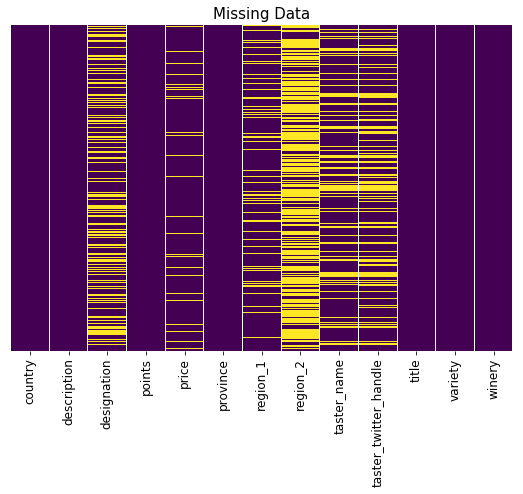

In [48]:
plt.figure(figsize=(9,6))
sns.heatmap(wine.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Missing Data',fontsize=15)
plt.xticks(fontsize=12)
plt.show()

Massive amounts of missing data from the designation, region_1, region_2, taster_name and taster_twitter_handle columns. How much data is missing from the price column??

In [49]:
wine['price'].isnull().value_counts()

False    120975
True       8996
Name: price, dtype: int64

In [50]:
wine = wine.drop(['region_1','region_2','taster_twitter_handle','designation','taster_name'],axis=1)

Remove heavy missing data columns instead of calling dropna(). dropna() would drop too many rows.



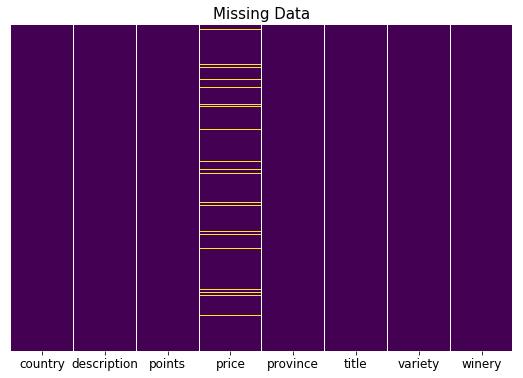

In [51]:
plt.figure(figsize=(9,6))
sns.heatmap(wine.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Missing Data',fontsize=15)
plt.xticks(fontsize=12)
plt.show()

In [52]:
wine = wine.dropna()

# Data Processing

In [53]:
wine.shape

(120915, 8)

In [54]:
wine.nunique()

country            42
description    111511
points             21
price             390
province          422
title          110582
variety           691
winery          15843
dtype: int64

Hmm. There are 120K rows, but only 111K unique descriptions and 110K unique titles. Let's see if any othere these are duplicates.

In [55]:
wine[wine.duplicated('title',keep=False)].sort_values('title').head(10)

,country,description,points,price,province,title,variety,winery
93375,Spain,Dusty notes of citrus fruits are mild but frie...,87,16.0,Catalonia,1+1=3 NV Brut Sparkling (Cava),Sparkling Blend,1+1=3
55163,Spain,Spiced apple and toast aromas are clean and di...,87,16.0,Catalonia,1+1=3 NV Brut Sparkling (Cava),Sparkling Blend,1+1=3
56109,Spain,"Clean, fresh apple aromas and a minerally, cit...",89,20.0,Catalonia,1+1=3 NV Cygnus Brut Nature Reserva Made With ...,Sparkling Blend,1+1=3
33657,Spain,"Clean, fresh apple aromas and a minerally, cit...",89,20.0,Catalonia,1+1=3 NV Cygnus Brut Nature Reserva Made With ...,Sparkling Blend,1+1=3
66222,US,"Merlot, Cabernet and Syrah form the core of th...",86,10.0,Washington,14 Hands 2011 Hot To Trot Red (Columbia Valley...,Red Blend,14 Hands
100235,US,"Merlot, Cabernet and Syrah form the core of th...",86,10.0,Washington,14 Hands 2011 Hot To Trot Red (Columbia Valley...,Red Blend,14 Hands
3793,US,In just a few years 14 Hands Riesling producti...,88,10.0,Washington,14 Hands 2013 Riesling (Washington),Riesling,14 Hands
68750,US,In just a few years 14 Hands Riesling producti...,88,10.0,Washington,14 Hands 2013 Riesling (Washington),Riesling,14 Hands
57235,US,Dried herb and wood spice aromas are followed ...,90,30.0,Washington,14 Hands 2013 The Reserve Cabernet Sauvignon (...,Cabernet Sauvignon,14 Hands
56652,US,Dried herb and wood spice aromas are followed ...,90,30.0,Washington,14 Hands 2013 The Reserve Cabernet Sauvignon (...,Cabernet Sauvignon,14 Hands


In [56]:
wine[wine.duplicated('description',keep=False)].sort_values('description').head(10)

,country,description,points,price,province,title,variety,winery
67614,US,"100% Malbec, it's redolent with dark plums, wi...",87,20.0,Washington,Roza Ridge 2010 Malbec (Rattlesnake Hills),Malbec,Roza Ridge
46540,US,"100% Malbec, it's redolent with dark plums, wi...",87,20.0,Washington,Roza Ridge 2010 Malbec (Rattlesnake Hills),Malbec,Roza Ridge
119702,US,"100% Sangiovese, this pale pink wine has notes...",88,18.0,Washington,Ross Andrew 2013 Meadow Rosé (Columbia Valley ...,Rosé,Ross Andrew
72181,US,"100% Sangiovese, this pale pink wine has notes...",88,18.0,Washington,Ross Andrew 2013 Meadow Rosé (Columbia Valley ...,Rosé,Ross Andrew
77609,US,A 100% varietal wine fermented in stainless st...,88,29.0,California,Ousterhout 2015 Woods Vineyard Rosé of Pinot N...,Pinot Noir,Ousterhout
55450,US,A 100% varietal wine fermented in stainless st...,88,29.0,California,Ousterhout 2015 Woods Vineyard Rosé of Pinot N...,Pinot Noir,Ousterhout
17024,US,A 100% varietal wine from near the town of Gle...,90,32.0,California,Dunbar 2013 Estate Grown Zinfandel (Sonoma Val...,Zinfandel,Dunbar
26740,US,A 100% varietal wine from near the town of Gle...,90,32.0,California,Dunbar 2013 Estate Grown Zinfandel (Sonoma Val...,Zinfandel,Dunbar
28413,US,"A 100% varietal wine from one vineyard, this w...",88,90.0,California,Rombauer 2012 Atlas Peak Vineyard Cabernet Sau...,Cabernet Sauvignon,Rombauer
34489,US,"A 100% varietal wine from one vineyard, this w...",88,90.0,California,Rombauer 2012 Atlas Peak Vineyard Cabernet Sau...,Cabernet Sauvignon,Rombauer


In [57]:
len(wine[wine.duplicated('description',keep=False)].sort_values('description'))

18802

Looks like both title and description have duplicates. Duplication in title seems a little more plausible than having duplicate data for description.

In [58]:
wine = wine.drop_duplicates('description')

In [59]:
wine.shape

(111511, 8)

In [60]:
wine.nunique()

country            42
description    111511
points             21
price             390
province          422
title          110556
variety           691
winery          15842
dtype: int64

In [61]:
wine['desc_length'] = wine['description'].apply(len)

The wine dataframe is now 19k rows and 4 columns slimmer. IMO, the real lose comes at losing the taster names. We still have variety, country and province, making up for the loss of region_1, region_2 and designation. Now that our data is all nice and clean, let's start doing some exploratory data analysis!!!

# Univariate Analysis and Visualization

Since we no longer have wine taster information, let's mostly focus our analysis on points, price, location, wine variety and description. 

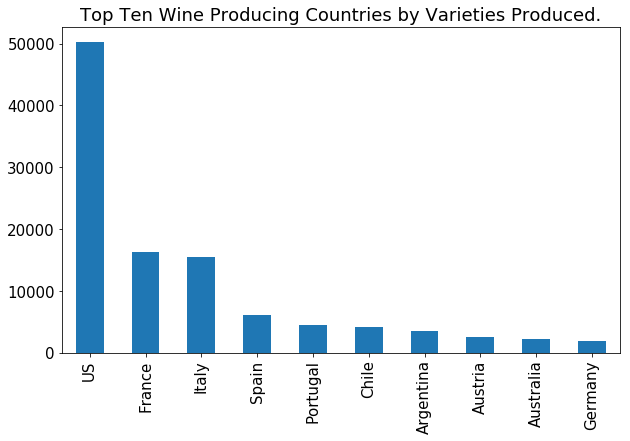

Top Ten Wine Producing Countries by Varieties Produced.

US           50229
France       16286
Italy        15492
Spain         6049
Portugal      4502
Chile         4129
Argentina     3500
Austria       2535
Australia     2169
Germany       1951
Name: country, dtype: int64


In [62]:
plt.figure(figsize=(10,6))
wine['country'].value_counts().head(10).plot.bar()
plt.title('Top Ten Wine Producing Countries by Varieties Produced.',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
print('Top Ten Wine Producing Countries by Varieties Produced.\n')
print(wine['country'].value_counts().head(10))

U.S.A. without a doubt is the top wine producer. Argentina is the only Latin American producer on the top ten list.

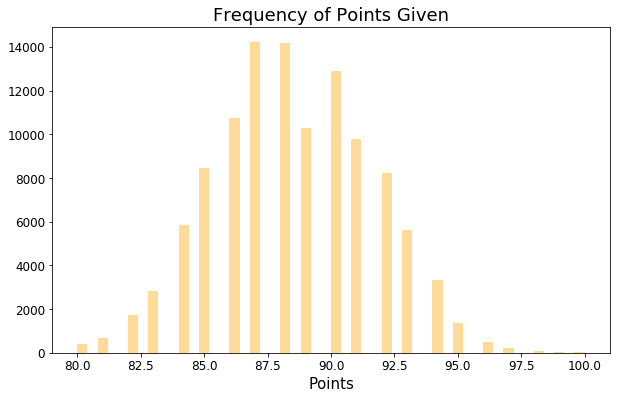

Frequency of Points Given

points
80       395
81       677
82      1749
83      2830
84      5856
85      8469
86     10741
87     14213
88     14197
89     10286
90     12908
91      9801
92      8239
93      5633
94      3328
95      1386
96       481
97       206
98        69
99        28
100       19
Name: points, dtype: int64


In [63]:
plt.figure(figsize=(10,6))
sns.distplot(wine['points'],kde=False,color='orange')
plt.title('Frequency of Points Given',fontsize=18)
plt.xlabel('Points',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
print('Frequency of Points Given\n')
print(wine.groupby('points')['points'].count())

This plot looks a lot like a normal distribution. The most frequent points given also happens to be the average points given.

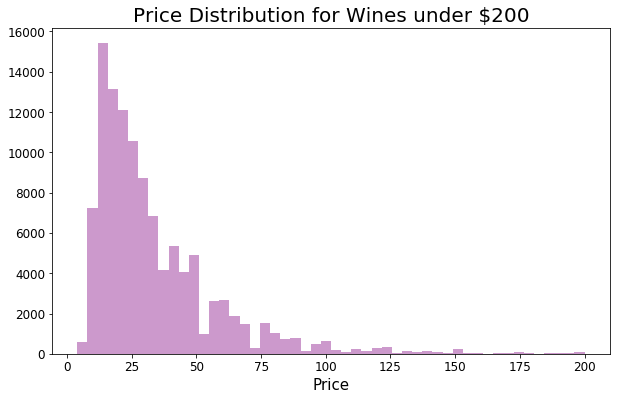

In [64]:
plt.figure(figsize=(10,6))
sns.distplot(wine[wine['price']<=200]['price'],kde=False,bins=50,color='purple')
plt.title('Price Distribution for Wines under $200',fontsize=20)
plt.xlabel('Price',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

A huge portion of Wines fall under the price range of 50 dollars. Also notice that the visual doesn't show any wines over the price of 200 dollars. The expensive outliers throw a wrench into the visual.

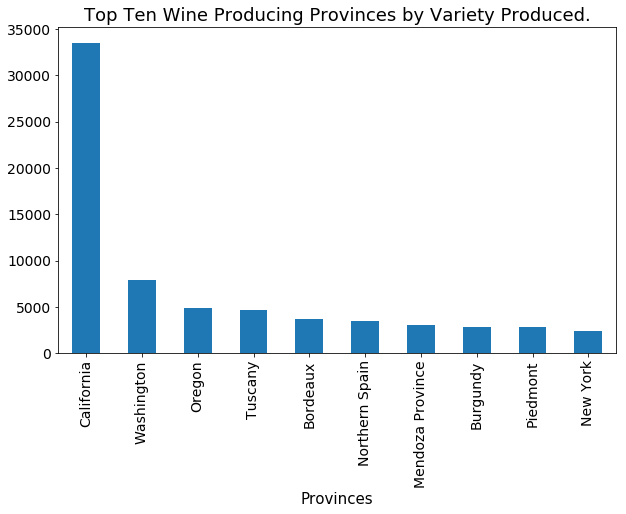

Top Ten Wine Producing Provinces by Variety Produced.

California          33520
Washington           7911
Oregon               4917
Tuscany              4686
Bordeaux             3692
Northern Spain       3503
Mendoza Province     3000
Burgundy             2872
Piedmont             2828
New York             2443
Name: province, dtype: int64


In [65]:
plt.figure(figsize=(10,6))
wine['province'].value_counts().head(10).plot.bar()
plt.title('Top Ten Wine Producing Provinces by Variety Produced.',fontsize=18)
plt.xlabel('Provinces',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
print('Top Ten Wine Producing Provinces by Variety Produced.\n')
print(wine['province'].value_counts().head(10))

California alone produces over twice as many varieties of wine as the next largest producing country, France!

In [66]:
print('Ratio of U.S. wine variety from California: ' + str(len(wine[wine['province']=='California']) / len(wine[wine['country']=='US'])))
print('Ratio of World wine variety from California: ' + str(len(wine[wine['province']=='California']) / len(wine)))

Ratio of U.S. wine variety from California: 0.6673435664655876
Ratio of World wine variety from California: 0.3005981472679825


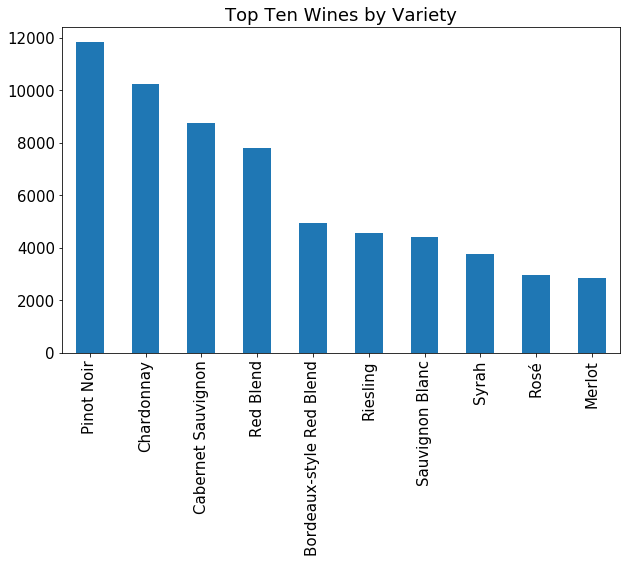

Top Ten Wines by Variety

Pinot Noir                  11832
Chardonnay                  10234
Cabernet Sauvignon           8758
Red Blend                    7796
Bordeaux-style Red Blend     4958
Riesling                     4571
Sauvignon Blanc              4399
Syrah                        3776
Rosé                         2950
Merlot                       2854
Name: variety, dtype: int64


In [67]:
plt.figure(figsize=(10,6))
wine['variety'].value_counts().head(10).plot.bar()
plt.title('Top Ten Wines by Variety',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
print('Top Ten Wines by Variety\n')
print(wine['variety'].value_counts().head(10))

The length of the taster's wine description also seems to be a normal distribution.

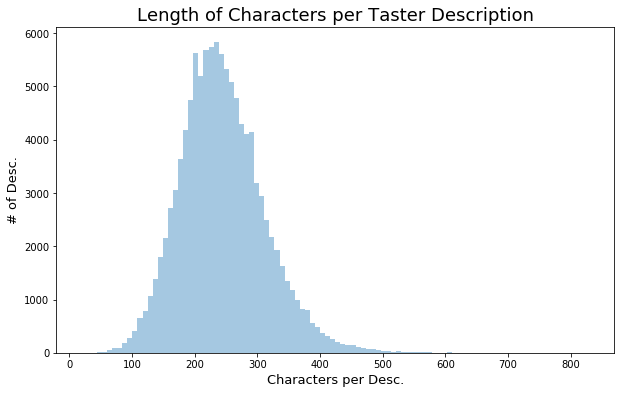

In [69]:
plt.figure(figsize=(10,6))
sns.distplot(wine['desc_length'],bins=100,kde=False)
plt.title('Length of Characters per Taster Description',fontsize=18)
plt.xlabel('Characters per Desc.',fontsize=15)
plt.ylabel('# of Desc.',fontsize=15)
plt.xlabel('Characters per Desc.',fontsize=13)
plt.ylabel('# of Desc.',fontsize=13)
plt.show()

# Bivariate Analysis and Visualization

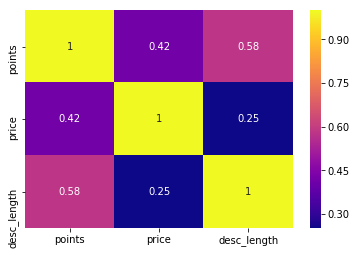

In [449]:
sns.heatmap(wine.corr(),annot=True,cmap='plasma')

There is some correlation between points / price and points / description length. Nothing rock hard though.

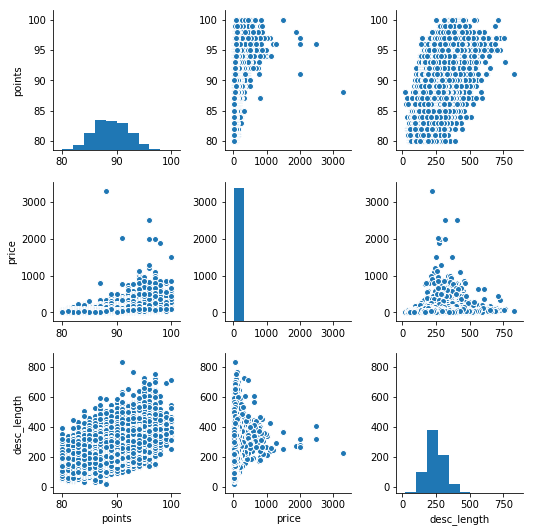

In [347]:
plt.figure(figsize=(10,6))
sns.pairplot(wine)
plt.show()

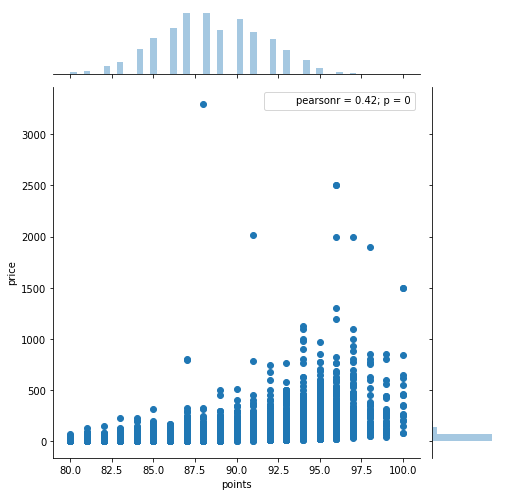

In [76]:
sns.jointplot(x='points',y='price',data=wine,size=7)

In [351]:
wine[wine['price']>=3000]

,country,description,points,price,province,title,variety,winery,desc_length
80290,France,This ripe wine shows plenty of blackberry frui...,88,3300.0,Bordeaux,Château les Ormes Sorbet 2013 Médoc,Bordeaux-style Red Blend,Château les Ormes Sorbet,224


The most expense wine is a French Bordeaux, and it got an average rating of 88 points.

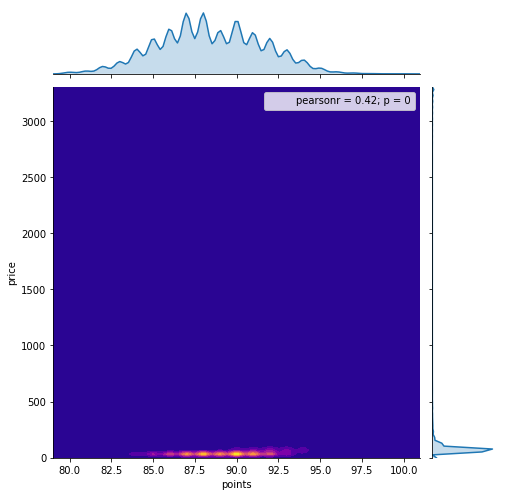

In [75]:
sns.jointplot(x='points',y='price',data=wine, kind='kde', cmap='plasma',size=7)

Hmm. These two plots are misleading. Let's get more precise by specifying some price parameters.

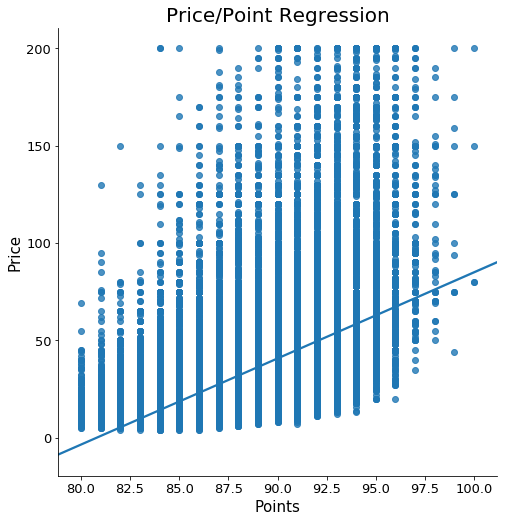

In [78]:
sns.lmplot(x='points',y='price',data=wine[wine['price']<=200],size=7)
plt.title('Price/Point Regression',fontsize=20)
plt.xlabel('Points',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

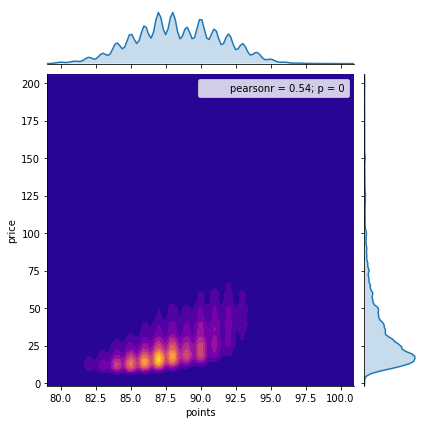

In [452]:
sns.jointplot(x='points',y='price',data=wine[wine['price']<=200], kind='kde',cmap='plasma')

Many wines don't cost much more than 50 dollars and have between 82 and 93 points.

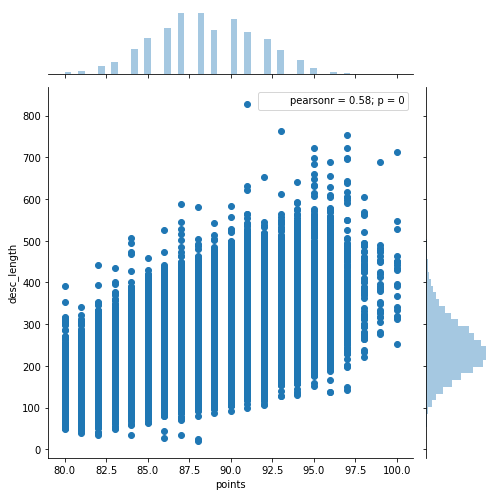

In [81]:
sns.jointplot(x='points',y='desc_length',data=wine,size=7)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

In [356]:
print(wine['description'][97446])

Dark, dusty, strongly scented with barrel toast, coffee grounds and incense, this is the most substantial and complete version to date. Balancing cherry and plum fruit against the pretty barrel-infused tannins, it glides gracefully across the palate into a seamless finish.   Saggi is the Long Shadows collaboration with Tuscany's Ambrogio and Giovanni Folonari. the blend in 2007 is 43% Sangiovese, 36% Cabernet Sauvignon and 21% Syrah. With each new vintage, the percentage of Sangiovese climbs, putting more Tuscany in this new world super-Tuscan wine. Dark, dusty, strongly scented with barrel toast, coffee grounds and incense, this is the most substantial and complete version to date. Balancing cherry and plum fruit against the pretty barrel-infused tannins, it glides gracefully across the palate into a seamless finish.


The longest review seems to be redundant. 

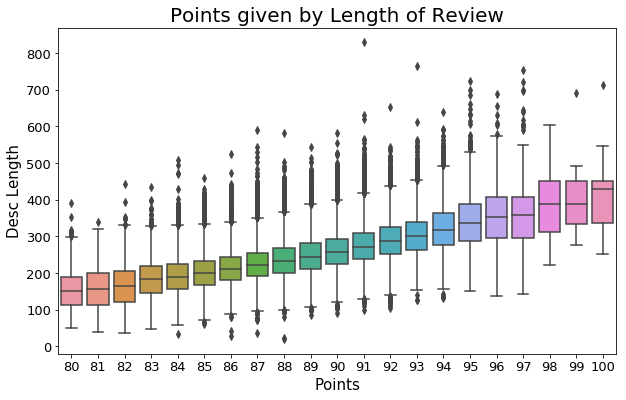

In [82]:
plt.figure(figsize=(10,6))
sns.boxplot(x='points', y='desc_length', data=wine)
plt.title('Points given by Length of Review',fontsize=20)
plt.xlabel('Points',fontsize=15)
plt.ylabel('Desc Length',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()


A correlation between points given and number of characters in a review.

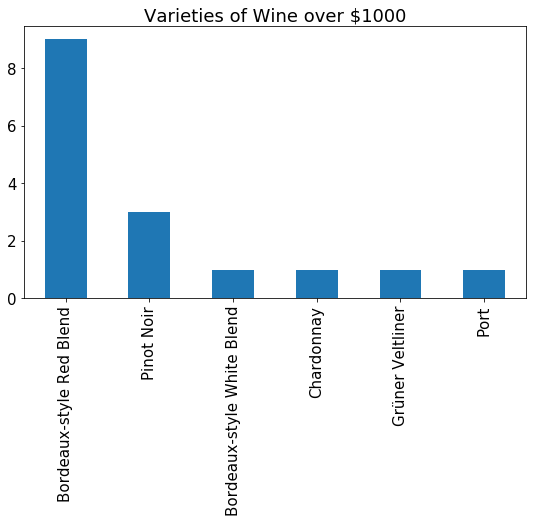

Varieties of Wine over $1000.

Bordeaux-style Red Blend      9
Pinot Noir                    3
Bordeaux-style White Blend    1
Chardonnay                    1
Grüner Veltliner              1
Port                          1
Name: variety, dtype: int64


In [86]:
plt.figure(figsize=(9,5))
wine[wine['price']>=1000]['variety'].value_counts().plot.bar()
plt.title('Varieties of Wine over $1000',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
print('Varieties of Wine over $1000.\n')
print(wine[wine['price']>=1000]['variety'].value_counts())

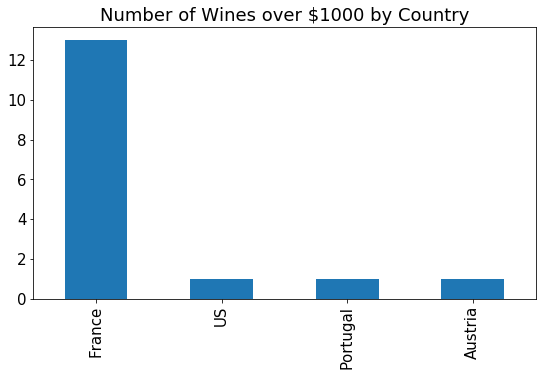

Number of Wines over $1000 by Country.

France      13
US           1
Portugal     1
Austria      1
Name: country, dtype: int64


In [88]:
plt.figure(figsize=(9,5))
wine[wine['price']>=1000]['country'].value_counts().plot.bar()
plt.title('Number of Wines over $1000 by Country',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
print('Number of Wines over $1000 by Country.\n')
print(wine[wine['price']>=1000]['country'].value_counts())

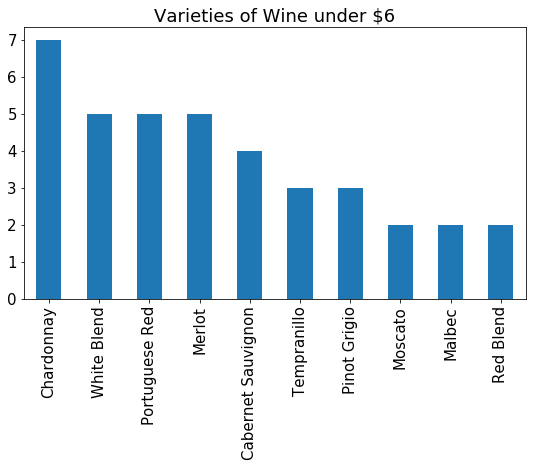

Varieties of Wine under $6.

Chardonnay            7
White Blend           5
Portuguese Red        5
Merlot                5
Cabernet Sauvignon    4
Tempranillo           3
Pinot Grigio          3
Moscato               2
Malbec                2
Red Blend             2
Name: variety, dtype: int64


In [89]:
plt.figure(figsize=(9,5))
wine[wine['price']<=5]['variety'].value_counts().head(10).plot.bar()
plt.title('Varieties of Wine under $6',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
print('Varieties of Wine under $6.\n')
print(wine[wine['price']<=5]['variety'].value_counts().head(10))

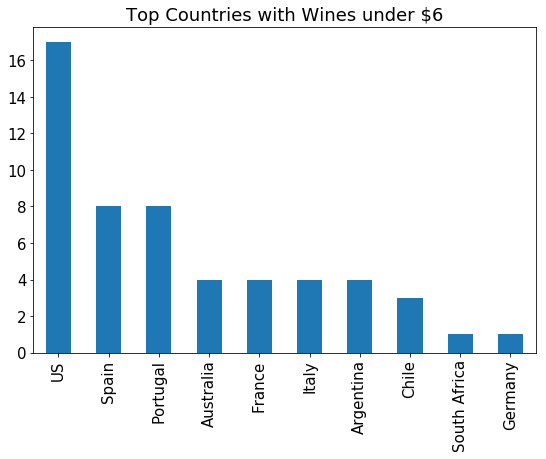

Top Countries with Wines under $6.

US              17
Spain            8
Portugal         8
Australia        4
France           4
Italy            4
Argentina        4
Chile            3
South Africa     1
Germany          1
Name: country, dtype: int64


In [90]:
plt.figure(figsize=(9,6))
wine[wine['price']<=5]['country'].value_counts().head(10).plot.bar()
plt.title('Top Countries with Wines under $6',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
print('Top Countries with Wines under $6.\n')
print(wine[wine['price']<=5]['country'].value_counts().head(10))

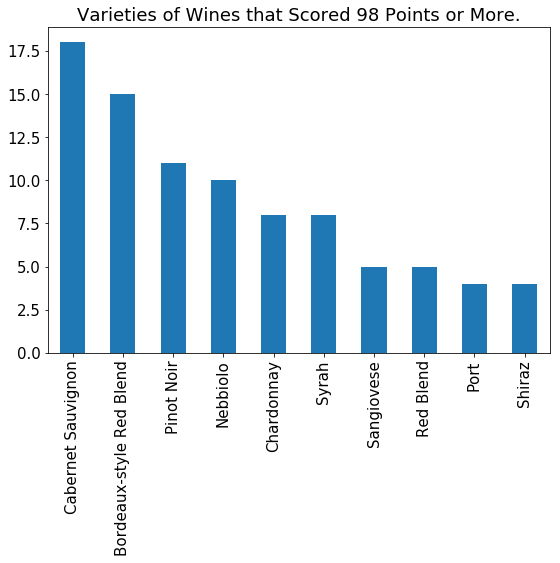

Varieties of Wines that scored 98 points or more.

Cabernet Sauvignon          18
Bordeaux-style Red Blend    15
Pinot Noir                  11
Nebbiolo                    10
Chardonnay                   8
Syrah                        8
Sangiovese                   5
Red Blend                    5
Port                         4
Shiraz                       4
Name: variety, dtype: int64


In [92]:
plt.figure(figsize=(9,6))
wine[wine['points']>=98]['variety'].value_counts().head(10).plot.bar()
plt.title('Varieties of Wines that Scored 98 Points or More.',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
print('Varieties of Wines that scored 98 points or more.\n')
print(wine[wine['points']>=98]['variety'].value_counts().head(10))

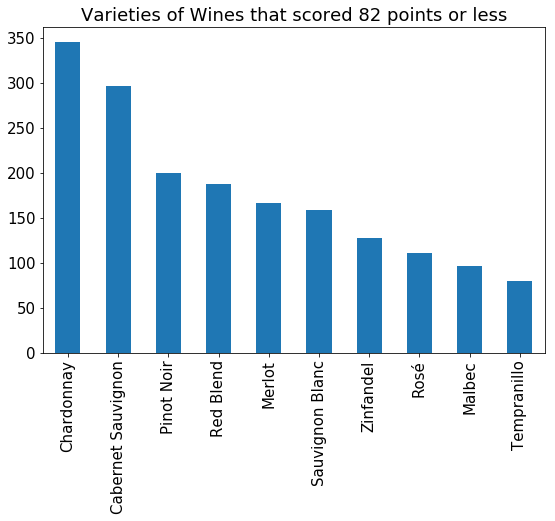

Varieties of Wines that scored 82 points or less.

Chardonnay            345
Cabernet Sauvignon    297
Pinot Noir            200
Red Blend             188
Merlot                167
Sauvignon Blanc       159
Zinfandel             128
Rosé                  111
Malbec                 96
Tempranillo            80
Name: variety, dtype: int64


In [94]:
plt.figure(figsize=(9,6))
wine[wine['points']<=82]['variety'].value_counts().head(10).plot.bar()
plt.title('Varieties of Wines that scored 82 points or less',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
print('Varieties of Wines that scored 82 points or less.\n')
print(wine[wine['points']<=82]['variety'].value_counts().head(10))

In [98]:
wine_country = wine.groupby('country')

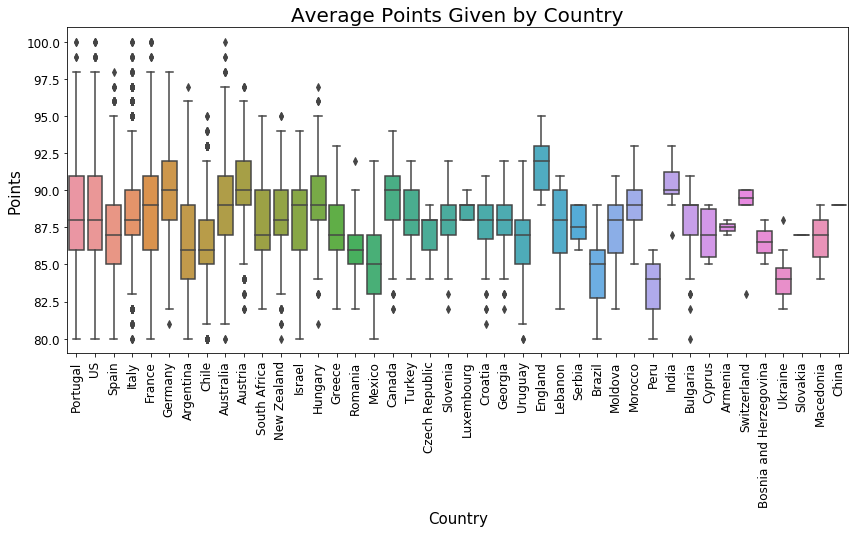

Average points given by Country

country
England        91.762712
India          90.250000
Austria        90.219724
Germany        89.878011
Canada         89.312500
Hungary        89.265625
China          89.000000
Luxembourg     88.800000
France         88.748127
Morocco        88.708333
Italy          88.633876
Australia      88.573997
US             88.558004
Switzerland    88.500000
Israel         88.470199
Name: points, dtype: float64


In [99]:
plt.figure(figsize=(14,6))
sns.boxplot(x='country',y='points',data=wine)
plt.title('Average Points Given by Country',fontsize=20)
plt.xticks(rotation = 90,fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Country',fontsize=15)
plt.ylabel('Points',fontsize=15)
plt.show()
print('Average points given by Country\n')
print(wine_country['points'].mean().sort_values(ascending=False).head(15))

Hmm. Looking at this boxplot, it seems that the number of varieties submitted is affecting the average score per country. Let's filter out any country that doesn't have at least 100 wine varieties.

In [100]:
big_wine = wine.groupby('country').filter(lambda x: len(x) > 100)

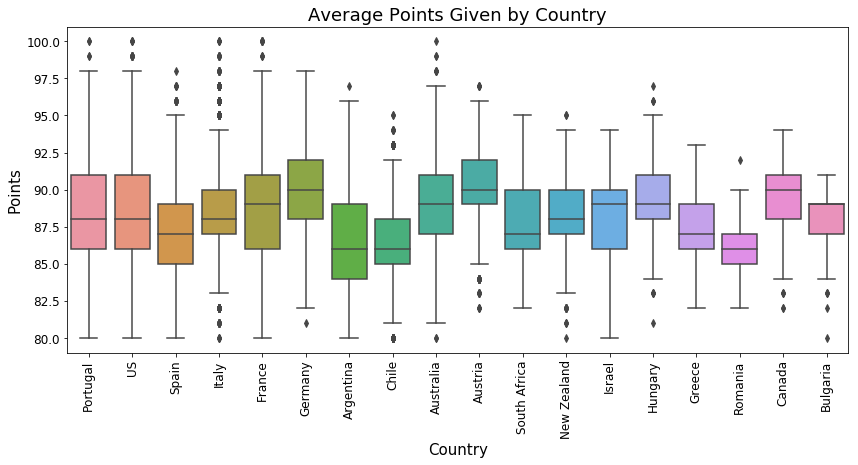

Average points givenby Country:

country
Austria         90.219724
Germany         89.878011
Canada          89.312500
Hungary         89.265625
France          88.748127
Italy           88.633876
Australia       88.573997
US              88.558004
Israel          88.470199
Portugal        88.329853
New Zealand     88.303226
Bulgaria        87.878788
South Africa    87.791632
Greece          87.239437
Spain           87.238552
Name: points, dtype: float64


In [102]:
plt.figure(figsize=(14,6))
sns.boxplot(x='country',y='points',data=big_wine)
plt.title('Average Points Given by Country',fontsize=18)
plt.xticks(rotation = 90,fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Country',fontsize=15)
plt.ylabel('Points',fontsize=15)
plt.show()
print('Average points givenby Country:\n')
print(big_wine.groupby('country')['points'].mean().sort_values(ascending=False).head(15))

Very interesting. Where did England, India, Hungary, China and Luxembourg go???

# Economy Wines

Bargin wines will by classified as the top 25% wines by points and bottom 25% of wines by price. Let's see where these wines are made and learn more about them!!!

In [104]:
wine.describe()

,points,price,desc_length
count,111511.000000,111511.000000,111511.000000
mean,88.413905,35.626073,244.473110
std,3.099332,42.116495,67.189665
min,80.000000,4.000000,20.000000
25%,86.000000,17.000000,198.000000
50%,88.000000,25.000000,239.000000
75%,91.000000,42.000000,285.000000
max,100.000000,3300.000000,829.000000


The top 25% of wines by score have 91 points or more. The bottom 25% of wines by price are priced at 17 dollars or less. Let's create a new dataframe that meets both of those criterion. 

In [105]:
economyWine = wine[(wine['points'] >= 91) & (wine['price'] <= 17)] 

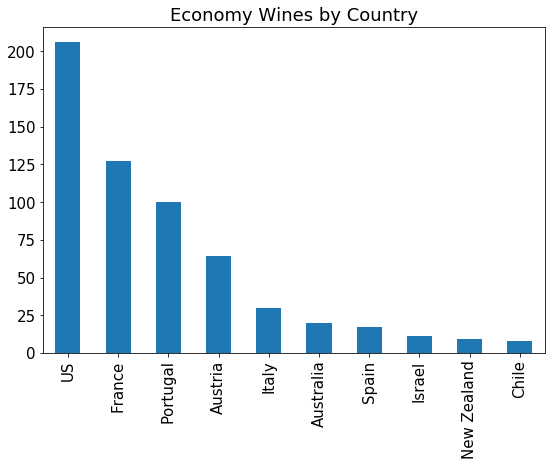

There are 618 economy wines.
Economy Wines by Country:

US             206
France         127
Portugal       100
Austria         64
Italy           30
Australia       20
Spain           17
Israel          11
New Zealand      9
Chile            8
Name: country, dtype: int64


In [109]:
plt.figure(figsize=(9,6))
economyWine['country'].value_counts().head(10).plot.bar()
plt.title('Economy Wines by Country',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
print('There are ' + str(len(economyWine)) + ' economy wines.')
print('Economy Wines by Country:\n')
print(economyWine['country'].value_counts().head(10))

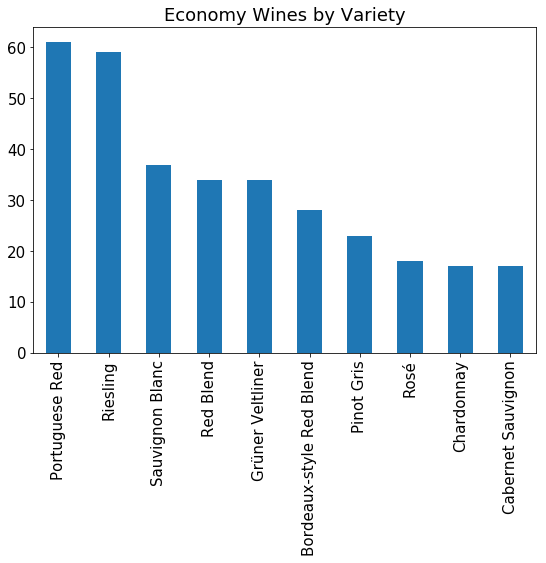

Economy Wines by Variety:

Portuguese Red              61
Riesling                    59
Sauvignon Blanc             37
Red Blend                   34
Grüner Veltliner            34
Bordeaux-style Red Blend    28
Pinot Gris                  23
Rosé                        18
Chardonnay                  17
Cabernet Sauvignon          17
Name: variety, dtype: int64


In [110]:
plt.figure(figsize=(9,6))
economyWine['variety'].value_counts().head(10).plot.bar()
plt.title('Economy Wines by Variety',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
print('Economy Wines by Variety:\n')
print(economyWine['variety'].value_counts().head(10))

No surprise that the country that produces the most economy wines is the United States. The top economy wine by variety is Portuguese Red!! Didn't see that coming.

# Super Economy Wines!

Super Economy Wines are top 25% by score and lowest 25% by price of the economy wine dataset. Let's create that dataset and see what it looks like!!

In [111]:
economyWine.describe()

,points,price,desc_length
count,618.000000,618.000000,618.000000
mean,91.347896,15.144013,270.681230
std,0.591953,1.752138,53.148887
min,91.000000,7.000000,147.000000
25%,91.000000,14.000000,234.000000
50%,91.000000,15.000000,267.000000
75%,92.000000,16.000000,303.000000
max,94.000000,17.000000,463.000000


In [112]:
superEcon = economyWine[(economyWine['points'] >= 92) & (economyWine['price'] <= 14)]

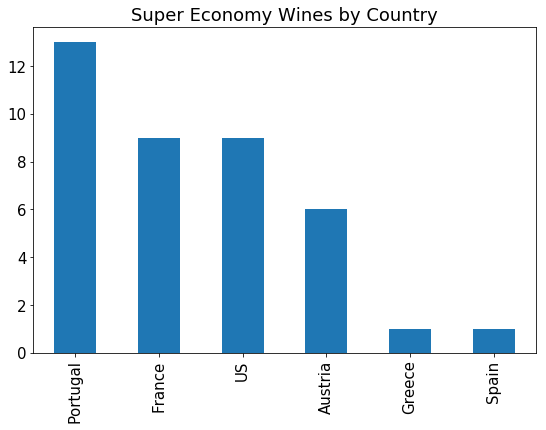

There are 39 super economy wines.
Super Economy Wines by Country:

Portugal    13
France       9
US           9
Austria      6
Greece       1
Spain        1
Name: country, dtype: int64


In [114]:
plt.figure(figsize=(9,6))
superEcon['country'].value_counts().plot.bar()
plt.title('Super Economy Wines by Country',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
print('There are ' + str(len(superEcon)) + ' super economy wines.')
print('Super Economy Wines by Country:\n')
print(superEcon['country'].value_counts())

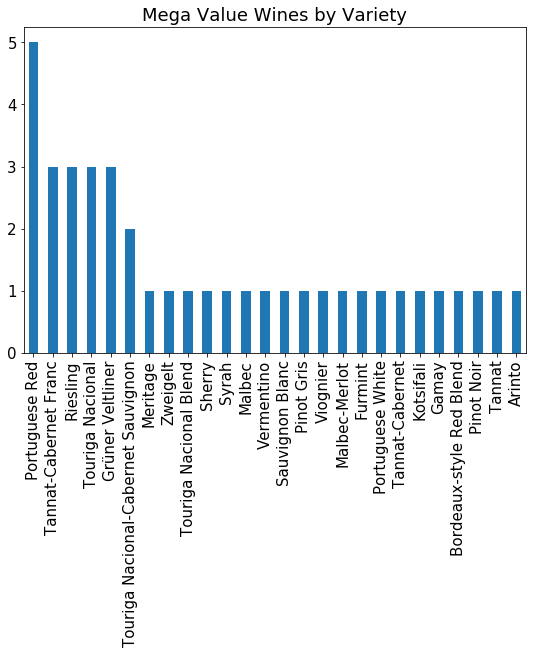

Mega Value wines by Variety

Portuguese Red                         5
Tannat-Cabernet Franc                  3
Riesling                               3
Touriga Nacional                       3
Grüner Veltliner                       3
Touriga Nacional-Cabernet Sauvignon    2
Meritage                               1
Zweigelt                               1
Touriga Nacional Blend                 1
Sherry                                 1
Syrah                                  1
Malbec                                 1
Vermentino                             1
Sauvignon Blanc                        1
Pinot Gris                             1
Viognier                               1
Malbec-Merlot                          1
Furmint                                1
Portuguese White                       1
Tannat-Cabernet                        1
Kotsifali                              1
Gamay                                  1
Bordeaux-style Red Blend               1
Pinot Noir                  

In [115]:
plt.figure(figsize=(9,6))
superEcon['variety'].value_counts().plot.bar()
plt.title('Mega Value Wines by Variety',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
print('Mega Value wines by Variety\n')
print(superEcon['variety'].value_counts())

Once again Portuguese wine comes out on top as the best bang for the buck. Portuguese Red is top dog by variety again. 

# Feedback is massively appreciated! Thank you.